Загружаем все нужные либы

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='latin1')
data

# без encoding файл почему то не считывается корректно

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Сверху мы считали файл, внизу небольшая визуалицая чтобы понимать, с чем мы вообще будем рабоать

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Чистим дубликаты + преобразуем данные

In [ ]:
data.dropna(inplace=True)

Вектора и матрицц

In [ ]:
temperature = np.array(data['Temperature(°C)'])
humidity = np.array(data['Humidity(%)'])
bikes_rented = np.array(data['Rented Bike Count'])

Зима + утренние часы

Теперь перейдем к векторам

In [ ]:
vector1 = np.array([10, 12, 33])
vector2 = np.array([49, 5, 56])

In [ ]:
vector1

array([10, 12, 33])

In [ ]:
vector2

array([49,  5, 56])

Операции над векторами, будет сложение, вычитаение и умножение на какое то число

In [ ]:
vector1 + vector2

array([59, 17, 89])

In [ ]:
vector2 - vector1

array([39, -7, 23])

In [ ]:
(vector1 - vector2) * -5

array([195, -35, 115])

скаля.производение

In [ ]:
dot_product = np.dot(temperature, bikes_rented)
dot_product

115860790.8

Корреляция Пирсона

In [ ]:
def pearson_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

corr_temp_bikes = pearson_correlation(temperature, bikes_rented)
corr_temp_bikes

0.5385581530139789

Cos сходство

In [ ]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

cos_sim = cosine_similarity(temperature, bikes_rented)
cos_sim

0.7881519894084646

Нормализация векторов

In [ ]:
def normalize_vector(x):
    return x / np.linalg.norm(x)

normalized_temp = normalize_vector(temperature)
normalized_bikes = normalize_vector(bikes_rented)

In [ ]:
normalized_bikes

array([0.00284106, 0.00228179, 0.00193505, ..., 0.00776257, 0.00796391,
       0.00653219])

In [ ]:
normalized_temp

array([-0.0031625 , -0.00334495, -0.00364904, ...,  0.00158125,
        0.00127716,  0.00115553])

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Поиск сходства

In [ ]:
def find_similar_days(query_vector, data_vectors):
    similarities = []
    for i, vec in enumerate(data_vectors):
        sim = cosine_similarity(query_vector, vec)
        similarities.append((i, sim))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:20]

first_20_days = data.iloc[:20]
first_20_weather = np.array(first_20_days[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']])

query_day = first_20_weather[0]
similar_days = find_similar_days(query_day, first_20_weather)

In [ ]:
for day_index, similarity in similar_days:
      print(f"день {day_index + 1}: сходство = {similarity:.6f}")

день 1: сходство = 1.000000
день 11: сходство = 0.999943
день 5: сходство = 0.999667
день 3: сходство = 0.999355
день 6: сходство = 0.999322
день 2: сходство = 0.999270
день 4: сходство = 0.999231
день 7: сходство = 0.998660
день 8: сходство = 0.997982
день 9: сходство = 0.997582
день 10: сходство = 0.994512
день 12: сходство = 0.993320
день 20: сходство = 0.989613
день 19: сходство = 0.988277
день 18: сходство = 0.987791
день 17: сходство = 0.986817
день 16: сходство = 0.980152
день 13: сходство = 0.977395
день 14: сходство = 0.972529
день 15: сходство = 0.967785


фильтрация врем.рядов

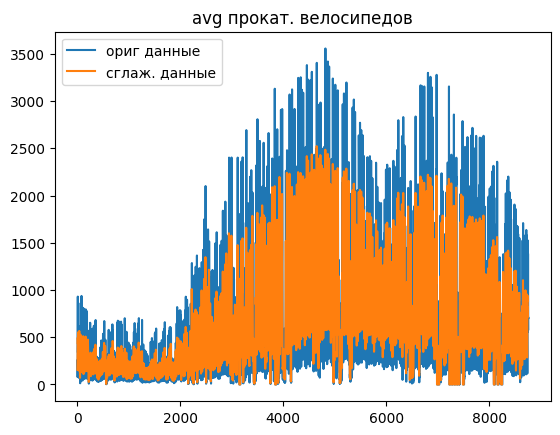

In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

smoothed_bikes = moving_average(bikes_rented, window_size=7)
plt.plot(bikes_rented, label="ориг данные")
plt.plot(smoothed_bikes, label="сглаж. данные")
plt.legend()
plt.title("avg прокат. велосипедов")
plt.show()

Кластеризация методом k-средних

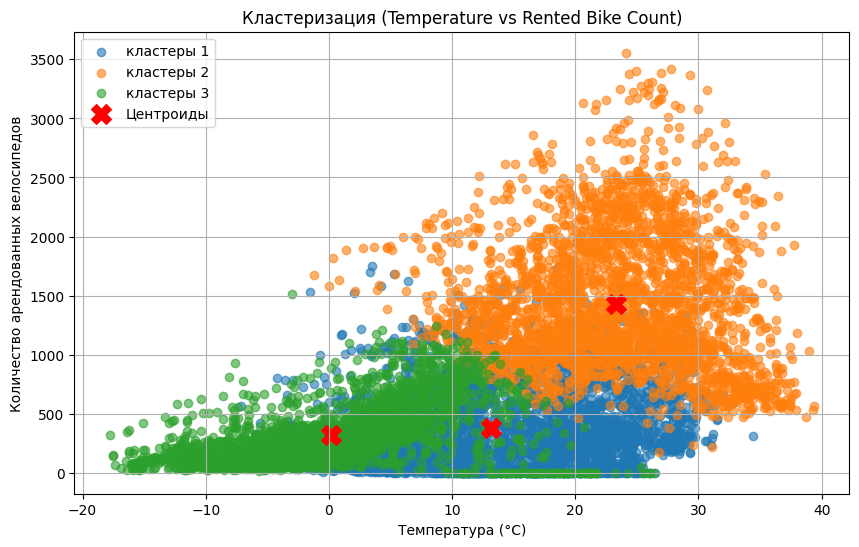

In [ ]:
X = data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rented Bike Count']].values
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

def k_means(data, k=3, max_iter=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels, centroids = k_means(X_scaled, k=3)

plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 3], label=f'кластеры {i+1}', alpha=0.6)

centroids_unscaled = centroids * X.std(axis=0) + X.mean(axis=0)
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 3], c='red', marker='X', s=200, label='Центроиды')


plt.title("Кластеризация (Temperature vs Rented Bike Count)")
plt.xlabel("Температура (°C)")
plt.ylabel("Количество арендованных велосипедов")
plt.legend()
plt.grid(True)
plt.show()


геним случайные данные + анализируем их (по Пирсу)

In [ ]:
np.random.seed(69)
random_temperature = np.random.normal(loc=20, scale=5, size=len(temperature))
random_bikes = np.random.normal(loc=500, scale=100, size=len(bikes_rented))

In [ ]:
corr_random = pearson_correlation(random_temperature, random_bikes)
corr_random

0.0015957056205789229

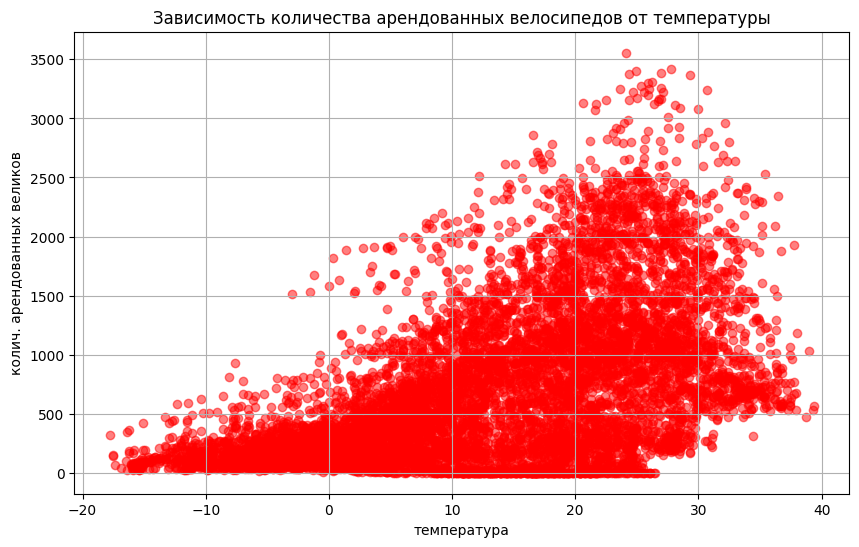

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(temperature, bikes_rented, alpha=0.5, color='red')
plt.title("Зависимость количества арендованных велосипедов от температуры")
plt.xlabel("температура")
plt.ylabel("колич. арендованных великов")
plt.grid(True)
plt.show()

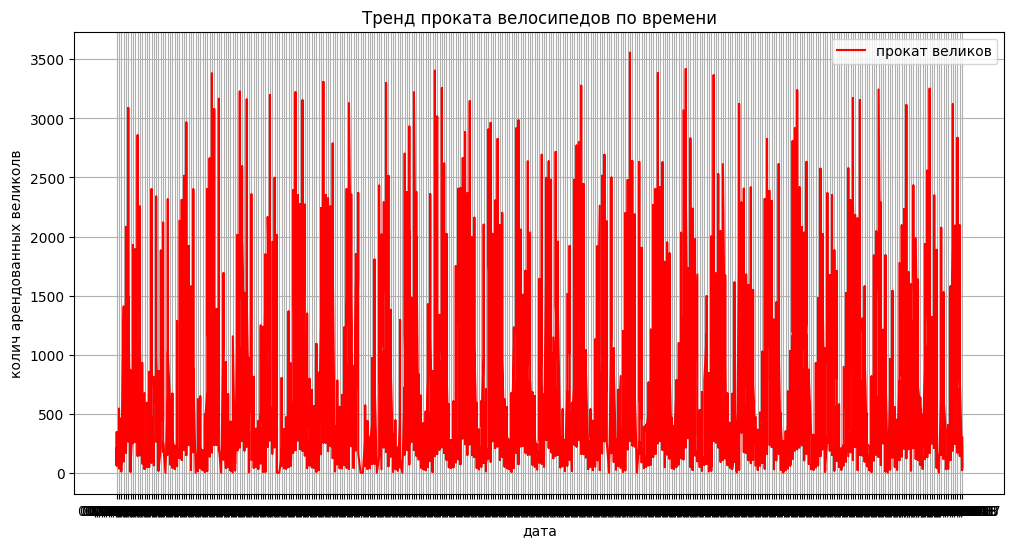

In [ ]:
data.sort_values(by='Date', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rented Bike Count'], label="прокат великов", color='red')
plt.title("Тренд проката велосипедов по времени")
plt.xlabel("дата")
plt.ylabel("колич арендованных великолв")
plt.legend()
plt.grid(True)
plt.show()